# Анализ имен (USA, 1880-2010)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
column_names = ['name', 'sex', 'count', 'year']
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob{0}.txt'
names = pd.DataFrame()
years = range(1880, 2011)

for year in years:
    p = pd.read_csv(url.format(year), names=column_names)
    p['year'] = year
    names = names.append(p, ignore_index=True)


In [4]:
names.head()

,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [25]:
names.tail()

,name,sex,count,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


## Общая динамика рождаемости обоих полов

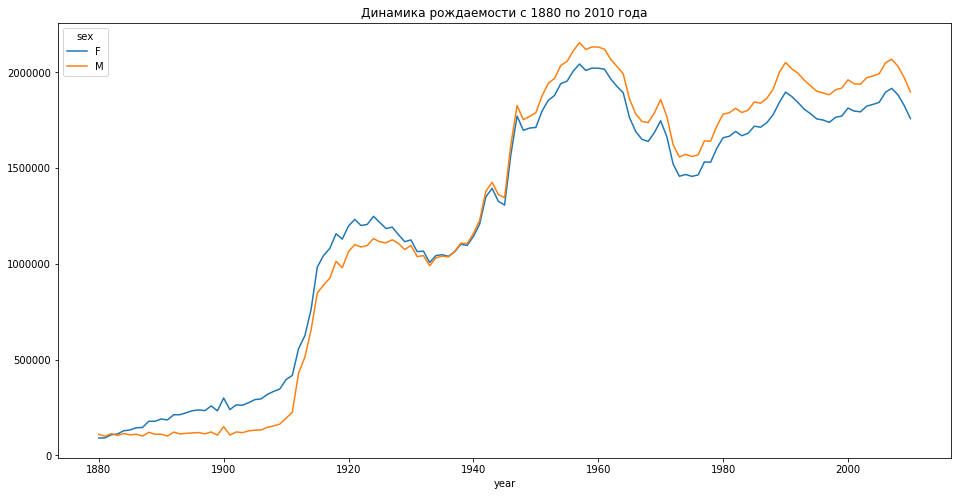

In [68]:
%matplotlib inline

names_by_year_and_sex = names.pivot_table('count', index='year',columns='sex', aggfunc=sum)
names_by_year_and_sex.plot(legend=True, figsize=(16, 8), title = 'Динамика рождаемости с 1880 по 2010 года')

## Самые популярные имена за всю историю 

In [17]:
names_count_by_sex = names.pivot_table(values='count', index='name',columns='sex',aggfunc=sum)
most_freq_five_femaly_names = names_count_by_sex['F'].sort_values(ascending=False).head(5)
most_freq_five_man_names = names_count_by_sex['M'].sort_values(ascending=False).head(5)

In [18]:
most_freq_five_femaly_names

name
Mary         4103935.0
Patricia     1568742.0
Elizabeth    1561874.0
Jennifer     1455078.0
Linda        1448771.0
Name: F, dtype: float64

In [19]:
most_freq_five_man_names

name
James      5049727.0
John       5040319.0
Robert     4767995.0
Michael    4243903.0
William    3986586.0
Name: M, dtype: float64

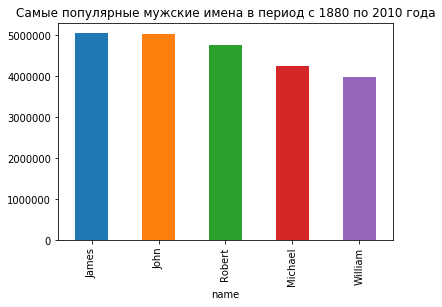

In [69]:
most_freq_five_man_names.plot(kind='bar', title = 'Самые популярные мужские имена в период с 1880 по 2010 года')

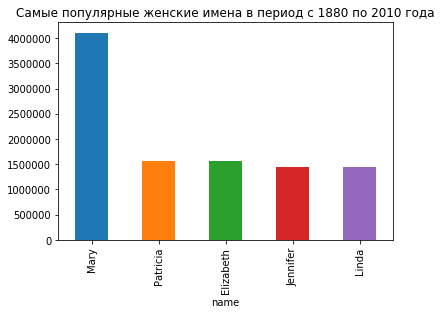

In [70]:
most_freq_five_femaly_names.plot(kind='bar', title = 'Самые популярные женские имена в период с 1880 по 2010 года')

## Динамика изменения популярности имен

In [61]:
import numpy as np
year_chunks = np.array_split(years, 10)

most_popular_men_names = set()
most_popular_women_names = set()

for chunk in year_chunks:
    names_chunk = names[names['year'].isin(chunk)]
    n = names_chunk.groupby(['name', 'sex'], as_index=False)['count'].sum()
    most_popular_men_names.add(n.loc[n[n.sex == 'M']['count'].idxmax()]['name'])
    most_popular_women_names.add(n.loc[n[n.sex == 'F']['count'].idxmax()]['name'])

In [62]:
most_popular_men_names

{'Jacob', 'James', 'John', 'Michael', 'Robert'}

In [63]:
most_popular_women_names

{'Emily', 'Jennifer', 'Jessica', 'Linda', 'Lisa', 'Mary'}

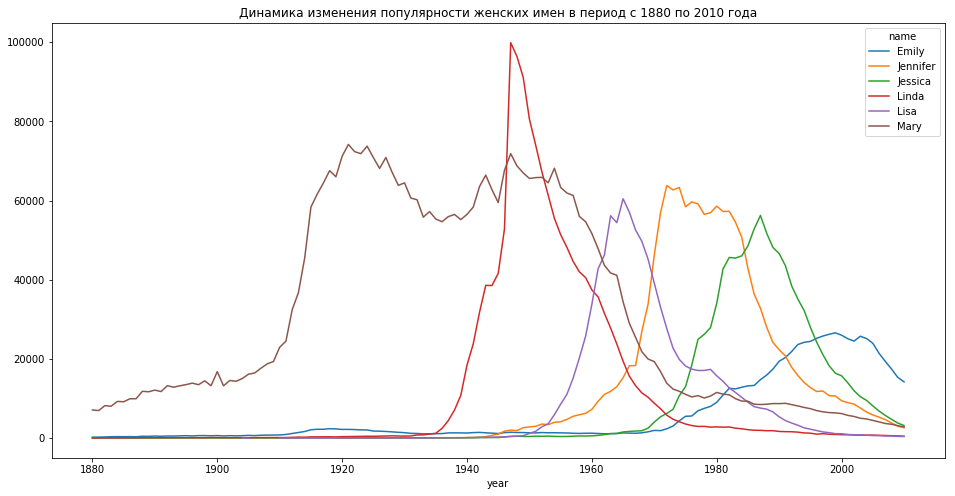

In [72]:
most_popular_women_names_by_year = names[names['name'].isin(most_popular_women_names)].pivot_table('count', index='year',columns='name', aggfunc=sum)
most_popular_women_names_by_year.plot(legend=True, figsize=(16, 8), title = 'Динамика изменения популярности женских имен в период с 1880 по 2010 года')

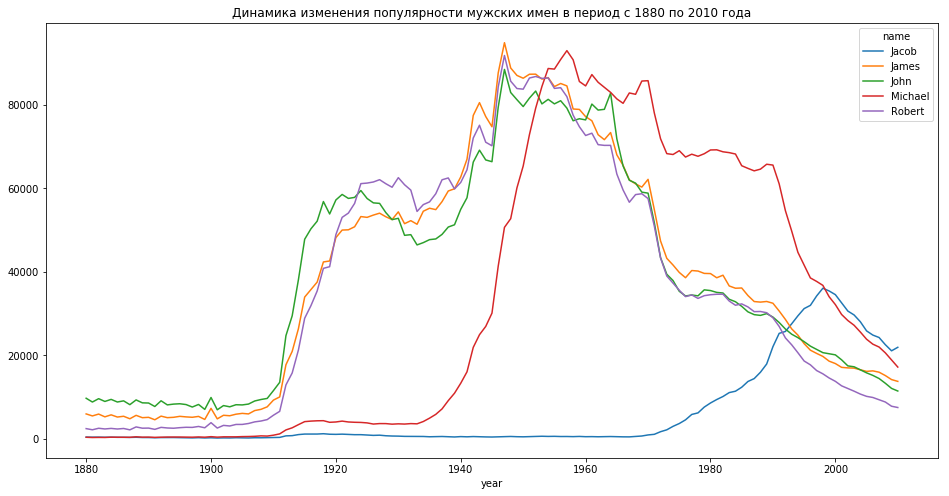

In [73]:
most_popular_men_names_by_year = names[names['name'].isin(most_popular_men_names)].pivot_table('count', index='year',columns='name', aggfunc=sum)
most_popular_men_names_by_year.plot(legend=True, figsize=(16, 8), title = 'Динамика изменения популярности мужских имен в период с 1880 по 2010 года')

## Распределение первой и последней буквы в имени

In [14]:
years = [1900, 1925, 1950, 1975, 2000]
names_from_five_years = names[names['year'].isin(years)]
first_letters = names_from_five_years['name'].map(lambda x: x[0])
last_letters = names_from_five_years['name'].map(lambda x: x[-1])
last_letters_table = names.pivot_table('count', index=last_letters, columns=['year'], aggfunc=sum)
first_letters_table = names.pivot_table('count', index=first_letters, columns=['year'], aggfunc=sum)

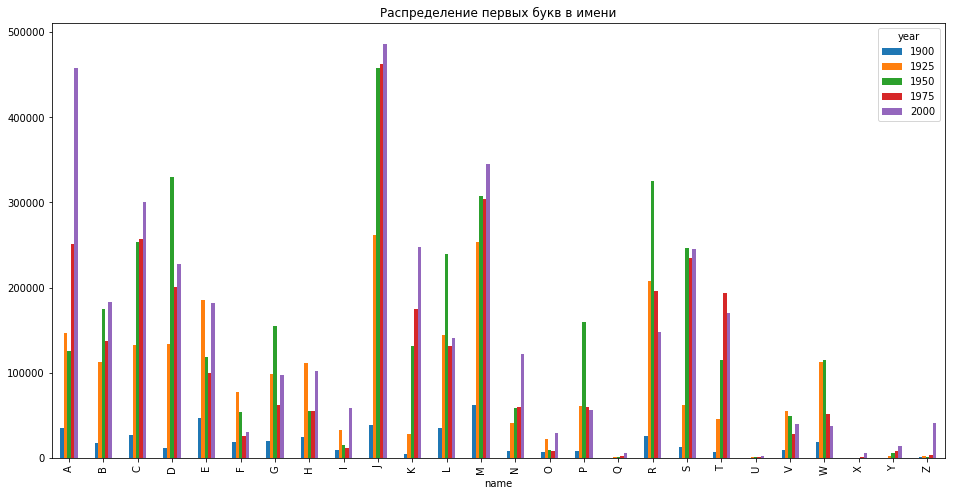

In [15]:
first_letters_table.plot.bar(figsize=(16, 8), legend=True, title='Распределение первых букв в имени')

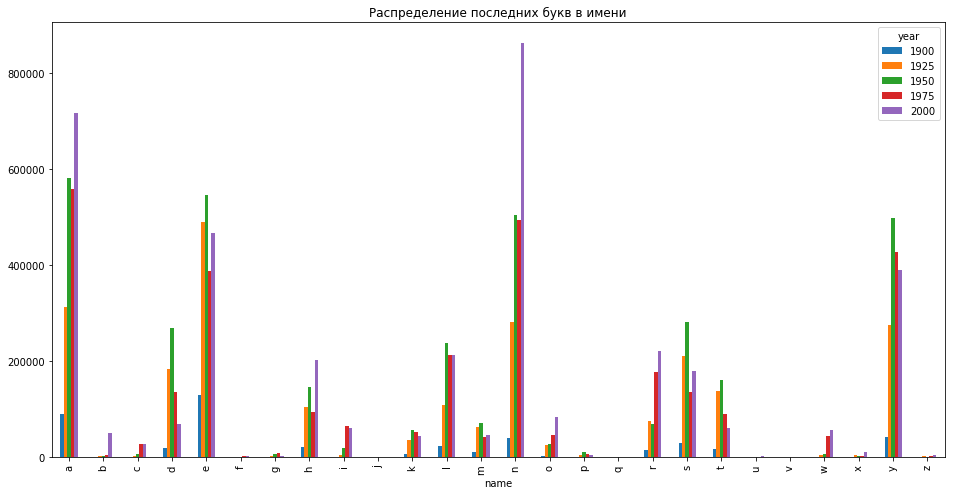

In [16]:
last_letters_table.plot.bar(figsize=(16, 8), legend=True, title='Распределение последних букв в имени')

## Влияние известных личностей на популярность имени

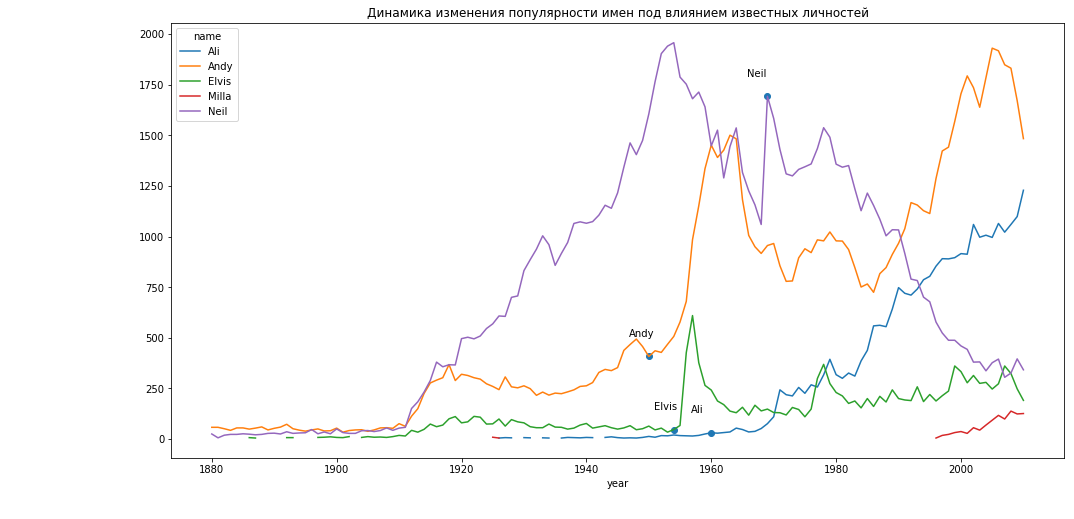

In [164]:
most_famous_usa_peoples = {
    'Elvis': 1954,    # the popular singer in 1954-1977
    'Andy': 1950,     # the popular artist (Andy Warhol, the first success was in 1950)
    'Milla': 1988,    # Milla Jovovich, a popular actress (the first film in 1988)
    'Ali': 1960,      # Muhammad Ali was an American former professional boxer, professional debut in 1960
    'Neil': 1969      # Neil Armstrong was an American astronaut who was the first person to walk on the Moon (in 1969)

}
famous_people_names = list(most_famous_usa_peoples.keys())
famous_people_years = list(most_famous_usa_peoples.values())
most_famous_usa_peoples_by_year = names[names['name'].isin(famous_people_names)].pivot_table('count', index='year',columns='name', aggfunc=sum)
most_famous_usa_peoples_by_year.plot(legend=True, figsize=(16, 8), title = 'Динамика изменения популярности имен под влиянием известных личностей')

famous_people_name_count = [most_famous_usa_peoples_by_year.loc[year][name] for name, year in most_famous_usa_peoples.items()]
plt.scatter(famous_people_years, famous_people_name_count)

for label, x, y in zip(famous_people_names, famous_people_years, famous_people_name_count):
    plt.annotate(label, xy=(x,y),xytext=(-20, 20), textcoords='offset points')

## Разнообразие имен

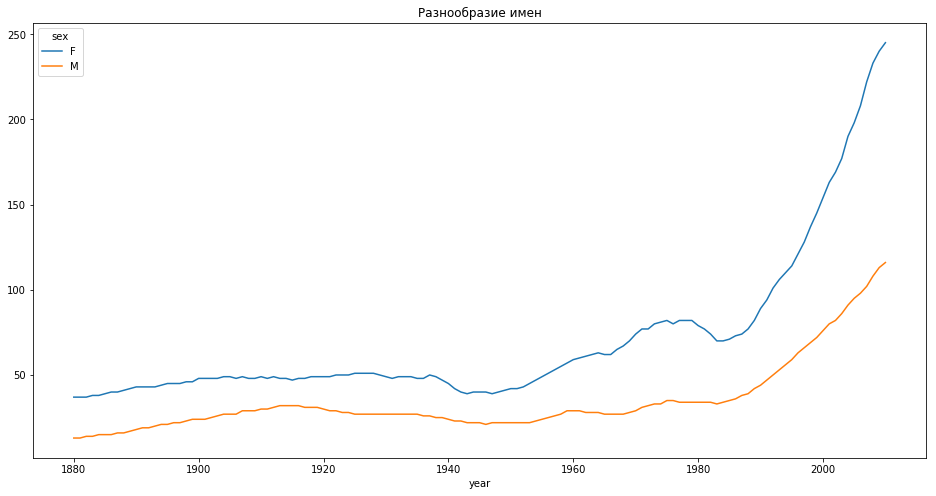

In [195]:
names_with_distrib = names.groupby(['year', 'sex']).apply(lambda x: x['count'] / x['count'].sum()).reset_index(name='percentage')
names_with_distrib = names_with_distrib.groupby(['year', 'sex']).apply(lambda x: x.sort_values(by = 'percentage', ascending=False).percentage.cumsum().values.searchsorted(0.5)).unstack('sex')
names_with_distrib.plot(legend=True, figsize=(16, 8), title = 'Разнообразие имен')